In [6]:
%pip install transformers torch pandas matplotlib sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [7]:
SOURCE = "data/games.csv"
#SOURCE = r"C:\Users\LUKY\Downloads\Steam Games Contexto\archive\games.csv"

In [8]:
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
games = pd.read_csv(SOURCE)
games =  games[['AppID', 'Name', 'About the game', 'Supported languages']]
games.columns = ['id', 'name', 'description', 'languages']
print(games.count())
games

id             97410
name           97404
description    92540
languages      97410
dtype: int64


,id,name,description,languages
0,20200,Galactic Bowling,Galactic Bowling is an exaggerated and stylize...,['English']
1,655370,Train Bandit,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp..."
2,1732930,Jolt Project,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']"
3,1355720,Henosis™,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp..."
4,1139950,Two Weeks in Painland,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']"
...,...,...,...,...
97405,3080940,Femdom Game World: Mom,. Femdom Game World - is a fascinating series ...,"['English', 'Russian']"
97406,2593970,Blocky Farm,Enter the charming world of Blocky Farm where ...,"['English', 'French', 'Italian', 'German', 'Sp..."
97407,3137150,Infiltrate & Extract,Mission brief: You are deployed to a heavily g...,['English']
97408,3124670,Escape The Garage,"Welcome to Escape The Garage, the thrilling es...",['English']


### Analyse missing values

In [10]:
na_descriptions = games[games['description'].isna()]
games = games.dropna(subset=['description'])
na_descriptions

,id,name,description,languages
105,1943590,溪风谷之战 Playtest,NaN,[]
180,1966960,Burial Stone Playtest,NaN,[]
214,1688630,Emperial Knights Playtest,NaN,[]
220,1478660,Slotracers VR Playtest,NaN,[]
291,1613340,Pirates of the Asteroid Belt Playtest,NaN,[]
...,...,...,...,...
97363,3043240,Feed The Gods Playtest,NaN,[]
97385,3182940,The Invading Dark Playtest,NaN,[]
97387,3167240,丧尸卡牌：生存对决 Playtest,NaN,[]
97392,3027950,Karate Survivor Playtest,NaN,[]


In [11]:
na_languages = games[games['languages'].isna()]
na_languages

,id,name,description,languages


### Analyse description length and language
- Analyse if everything is available in english or not and if how much is in a different language
- Analyse the length of the description

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_25453/1962219597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['description_length'] = games['description'].apply(lambda x: len(str(x)))


<Axes: >

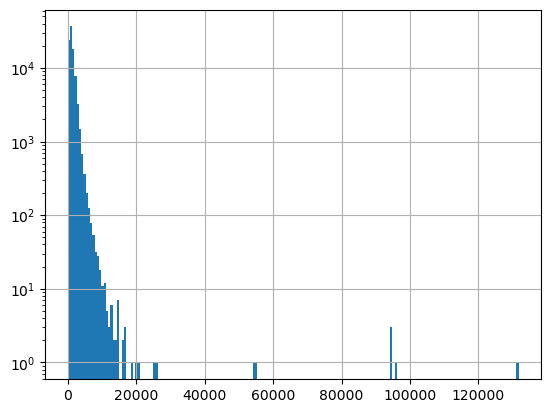

In [12]:
#Plot length of description in 10 buckets in a histogram
games['description_length'] = games['description'].apply(lambda x: len(str(x)))
games['description_length'].hist(bins=200, log=True)

<Axes: >

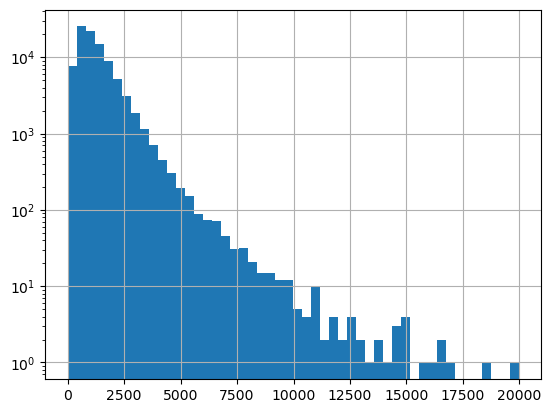

In [13]:
games[games['description_length'] < 20000]['description_length'].hist(bins=50, log=True)

In [14]:
games[games['description_length'] < 10]

,id,name,description,languages,description_length
8484,930840,东方百问~TouHouAsked,Null,['Simplified Chinese'],4
27215,1049220,Naxia,ABOUT US,['English'],8
32235,342570,HIS (Heroes In the Sky),-,['Vietnamese'],1
41794,797660,God Test,God Test,"['Traditional Chinese', 'English', 'Simplified...",8
56458,1493800,Aircraft Carrier Survival: Tutorial,/,"['English', 'French', 'German', 'Polish', 'Por...",1
59079,109600,Neverwinter,',"['English', 'French', 'Italian', 'German', 'Ru...",1
70543,1885570,"Happy Live,Show Up!",游戏介绍 角色介绍,['Simplified Chinese'],9
77044,1441010,The Pacifist's Great and Final Nightmare,-,['English'],1
77863,1269720,已下架,已下架,['Simplified Chinese'],3
80857,2371310,Morphus,Socials,['English'],7


In [15]:
#Analyse the languages
games['english_available'] = games['languages'].apply(lambda x: 'english' in x.lower())
games['english_available'].value_counts()

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_25453/567090912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['english_available'] = games['languages'].apply(lambda x: 'english' in x.lower())


english_available
True     88131
False     4409
Name: count, dtype: int64

In [16]:
#Drop not english games
games = games[games['english_available']]
games

,id,name,description,languages,description_length,english_available
0,20200,Galactic Bowling,Galactic Bowling is an exaggerated and stylize...,['English'],1043,True
1,655370,Train Bandit,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",491,True
2,1732930,Jolt Project,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",628,True
3,1355720,Henosis™,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",615,True
4,1139950,Two Weeks in Painland,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",672,True
...,...,...,...,...,...,...
97405,3080940,Femdom Game World: Mom,. Femdom Game World - is a fascinating series ...,"['English', 'Russian']",1714,True
97406,2593970,Blocky Farm,Enter the charming world of Blocky Farm where ...,"['English', 'French', 'Italian', 'German', 'Sp...",763,True
97407,3137150,Infiltrate & Extract,Mission brief: You are deployed to a heavily g...,['English'],1068,True
97408,3124670,Escape The Garage,"Welcome to Escape The Garage, the thrilling es...",['English'],1328,True


<Axes: >

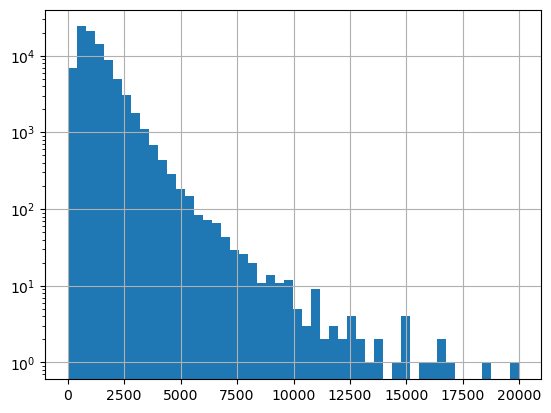

In [17]:
games[games['description_length'] < 20000]['description_length'].hist(bins=50, log=True)

### Threshold for description length

In [18]:
games[games['description_length'] < 120]

,id,name,description,languages,description_length,english_available
723,788040,Edvog Explorer Game,Important ! The game will soon be retired from...,['English'],62,True
1330,353540,Stephen's Sausage Roll,A simple 3d puzzle game.,['English'],24,True
1563,497590,Sapper's bad dream,The bomberman's nightmare. Or is it not a drea...,['English'],99,True
1588,1487440,Live Labyrinth,"A living maze is drawn during its passage, and...","['English', 'Russian', 'French', 'Italian', 'G...",118,True
2115,663920,DoFi,Under construction...,['English'],21,True
...,...,...,...,...,...,...
94881,3036810,Shiftall Controller Driver,Installing this driver allows the supported co...,"['English', 'Japanese']",106,True
95071,3073680,Fish,you click fish and get random fish. 100 differ...,"['English', 'French', 'Italian', 'German', 'Sp...",101,True
95894,2545530,Go Outside,sometimes you should just turn off your PC and...,['English'],57,True
96270,2807430,Gravity,Welcome to Gravity! 100 puzzles await you Plac...,"['English', 'Russian', 'French', 'Italian', 'G...",105,True


In [19]:
#Drop games with description length less than 120
games = games[games['description_length'] > 120]

In [20]:
games[games['description_length'] > 3000].count()

id                    3984
name                  3984
description           3984
languages             3984
description_length    3984
english_available     3984
dtype: int64

In [21]:
#Cut off strings longer than 3000
games['description'] = games['description'].apply(lambda x: x[:3000])

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_25453/435338219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['description'] = games['description'].apply(lambda x: x[:3000])


### Check distribution now

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_25453/3455729789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['description_length'] = games['description'].apply(lambda x: len(str(x)))


<Axes: >

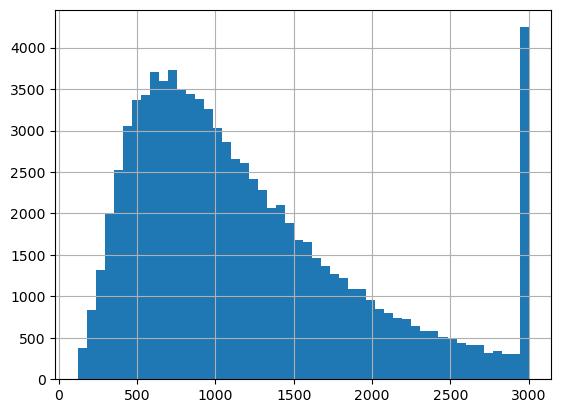

In [22]:
games['description_length'] = games['description'].apply(lambda x: len(str(x)))
games['description_length'].hist(bins=50)

## Embedding
This notebook will take the approach of sentence based embeddings with [sBERT](https://www.sbert.net/). Word embeddings can't be used as semantic meanings have to be captured. We will used the pre-trained model 'all-MiniLM-L6-v2' which is quite the standard.

**Things to check**
- Maybe fine-tuning of the embedding will be necessary
- sBERT has a token limit of 512 tokens. We have to ensure that our 3'000 length strings fit in that. Most probably a lot of text till be truncated as we can read in the [documentation](https://www.sbert.net/examples/applications/computing-embeddings/README.html)
- Currently no further text preprocessing is done. In the [documentation](https://www.sbert.net/docs/sentence_transformer/usage/semantic_textual_similarity.html) there's no hint on needed preprocessing as they also just pass in plain language where so we assume it's not necessary.

In [23]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

/Users/aceto/anaconda3/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/Users/aceto/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [24]:
try_out = games[games["name"].str.contains("Tomb")]
try_out

,id,name,description,languages,description_length,english_available
2334,849200,Shadow of the Tomb Raider: Definitive Edition,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...",1067,True
2874,890030,Shadow of the Tomb Raider: Definitive Edition,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...",1067,True
3029,849178,Shadow of the Tomb Raider: Definitive Edition,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...",1067,True
3084,1253270,Scoot Kaboom and the Tomb of Doom,Can you survive the Tomb of Doom? Scoot Kaboom...,['English'],948,True
3901,652830,Lost Legends: The Pharaoh's Tomb,"Your eyes take a moment to adjust, you’re diso...",['English'],1878,True
...,...,...,...,...,...,...
92852,2999240,Tomb nightmares,A cozy and atmospheric game for the evening. T...,"['English', 'German', 'Russian']",800,True
93451,2530310,Gifted: The Tombs,Gifted: The Tombs is a rogue-like dungeon craw...,['English'],1174,True
94645,2839940,The Tomb of Corruption,An alien disease is spreading and needs to be ...,['English'],2011,True
95764,2851150,Tomba! Special Edition,"Tomba! returns in Tomba! Special Edition , the...","['English', 'French', 'Italian', 'German', 'Sp...",993,True


In [25]:
try_out = games[games["name"].str.contains("Tomb")]
embeddings = model.encode(try_out['description'].tolist())
try_out['embeddings'] = embeddings.tolist()
try_out

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_25453/1124924527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  try_out['embeddings'] = embeddings.tolist()


,id,name,description,languages,description_length,english_available,embeddings
2334,849200,Shadow of the Tomb Raider: Definitive Edition,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...",1067,True,"[0.06343326717615128, 0.03546140715479851, -0...."
2874,890030,Shadow of the Tomb Raider: Definitive Edition,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...",1067,True,"[0.06343326717615128, 0.03546140715479851, -0...."
3029,849178,Shadow of the Tomb Raider: Definitive Edition,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...",1067,True,"[0.06343326717615128, 0.03546140715479851, -0...."
3084,1253270,Scoot Kaboom and the Tomb of Doom,Can you survive the Tomb of Doom? Scoot Kaboom...,['English'],948,True,"[-0.019371286034584045, 0.018362553790211678, ..."
3901,652830,Lost Legends: The Pharaoh's Tomb,"Your eyes take a moment to adjust, you’re diso...",['English'],1878,True,"[-0.016410481184720993, 0.030747830867767334, ..."
...,...,...,...,...,...,...,...
92852,2999240,Tomb nightmares,A cozy and atmospheric game for the evening. T...,"['English', 'German', 'Russian']",800,True,"[0.03149495646357536, 0.07274331152439117, -0...."
93451,2530310,Gifted: The Tombs,Gifted: The Tombs is a rogue-like dungeon craw...,['English'],1174,True,"[-0.033930979669094086, 0.05048377811908722, -..."
94645,2839940,The Tomb of Corruption,An alien disease is spreading and needs to be ...,['English'],2011,True,"[0.02549082785844803, 0.011602609418332577, 0...."
95764,2851150,Tomba! Special Edition,"Tomba! returns in Tomba! Special Edition , the...","['English', 'French', 'Italian', 'German', 'Sp...",993,True,"[-0.025958752259612083, 0.001619122689589858, ..."


In [26]:
try_out[try_out["name"].str.lower().str.contains("raider")]

,id,name,description,languages,description_length,english_available,embeddings
2334,849200,Shadow of the Tomb Raider: Definitive Edition,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...",1067,True,"[0.06343326717615128, 0.03546140715479851, -0...."
2874,890030,Shadow of the Tomb Raider: Definitive Edition,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...",1067,True,"[0.06343326717615128, 0.03546140715479851, -0...."
3029,849178,Shadow of the Tomb Raider: Definitive Edition,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...",1067,True,"[0.06343326717615128, 0.03546140715479851, -0...."
5046,849163,Shadow of the Tomb Raider: Definitive Edition,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...",1067,True,"[0.06343326717615128, 0.03546140715479851, -0...."
6264,849166,Shadow of the Tomb Raider: Definitive Edition,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...",1067,True,"[0.06343326717615128, 0.03546140715479851, -0...."
7776,849177,Shadow of the Tomb Raider: Definitive Edition,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...",1067,True,"[0.06343326717615128, 0.03546140715479851, -0...."
9362,8000,Tomb Raider: Anniversary,Tomb Raider: Anniversary retraces Lara Croft's...,"['English', 'French', 'German', 'Italian', 'Sp...",2036,True,"[0.05213550105690956, 0.014603646472096443, -0..."
10216,225020,Tomb Raider VI: The Angel of Darkness,A series of grisly murders brings Lara into co...,['English'],481,True,"[-0.02054806798696518, -0.000278221326880157, ..."
10473,233410,Tomb Raider - The Final Hours Digital Book,How did Crystal Dynamics reinvent Tomb Raider?...,['English'],751,True,"[0.029012786224484444, -0.004308711271733046, ..."
12169,225000,Tomb Raider V: Chronicles,Lara Croft is missing in Egypt - presumed dead...,['English'],333,True,"[0.11889545619487762, 0.0008081530104391277, -..."


In [27]:
g_1 = try_out[try_out["id"] == 849177]
g_2 = try_out[try_out["id"] == 391220]

In [28]:
g_1

,id,name,description,languages,description_length,english_available,embeddings
7776,849177,Shadow of the Tomb Raider: Definitive Edition,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...",1067,True,"[0.06343326717615128, 0.03546140715479851, -0...."


In [29]:
g_2

,id,name,description,languages,description_length,english_available,embeddings
13400,391220,Rise of the Tomb Raider™,Rise of the Tomb Raider: 20 Year Celebration i...,"['English', 'French', 'Italian', 'German', 'Sp...",2064,True,"[0.02038213238120079, -0.02812141366302967, -0..."


In [31]:
#Get similarity of the first two games
similarity = model.similarity(g_1["embeddings"].iloc[0], g_2["embeddings"].iloc[0])
print(f"Similarity {g_1['name'].iloc[0]} and {g_2['name'].iloc[0]}: {similarity[0][0]}")

Similarity Shadow of the Tomb Raider: Definitive Edition and Rise of the Tomb Raider™: 0.7960406541824341


In [32]:
len(g_1["embeddings"].iloc[0])

384

In [37]:
try_out = games[games["name"].str.contains("Tomb")]['description'].tolist()
try_out[1]

'In Shadow of the Tomb Raider Definitive Edition experience the final chapter of Lara’s origin as she is forged into the Tomb Raider she is destined to be. Combining the base game, all seven DLC challenge tombs, as well as all downloadable weapons, outfits, and skills, Shadow of the Tomb Raider Definitive Edition is the ultimate way to experience Lara’s defining moment. Survive and Thrive In the Deadliest Place on Earth: Master an unforgiving jungle setting in order to survive. Explore underwater environments filled with crevasses and deep tunnel systems. Become One With the Jungle: Outgunned and outnumbered, Lara must use the jungle to her advantage. Strike suddenly and disappear like a jaguar, use mud as camouflage, and instill fear in enemies to sow chaos. Discover Dark and Brutal Tombs: Tombs are more terrifying than ever before, requiring advanced traversal techniques to reach them, and once inside they are filled with deadly puzzles. Uncover Living History: Discover a hidden city

In [39]:
embeddings = model.encode(try_out)
embeddings

array([[ 0.06343327,  0.03546141, -0.02602137, ..., -0.00740381,
        -0.02220744,  0.02165746],
       [ 0.06343327,  0.03546141, -0.02602137, ..., -0.00740381,
        -0.02220744,  0.02165746],
       [ 0.06343327,  0.03546141, -0.02602137, ..., -0.00740381,
        -0.02220744,  0.02165746],
       ...,
       [ 0.02549083,  0.01160261,  0.01183154, ...,  0.00622795,
         0.01721971,  0.00143279],
       [-0.02595875,  0.00161912, -0.01403517, ..., -0.07431141,
        -0.00046543,  0.03900463],
       [ 0.01256837,  0.02807377,  0.00240498, ..., -0.00124454,
        -0.07366564,  0.00493834]], dtype=float32)

In [40]:
len(try_out)

84

In [41]:
model_bigger = SentenceTransformer('all-mpnet-base-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/Users/aceto/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [51]:
try_out = games[games["name"].str.contains("Tomb")]
embeddings = model_bigger.encode(try_out['description'].tolist())
try_out['embeddings'] = embeddings.tolist()
try_out

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_25453/502143887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  try_out['embeddings'] = embeddings.tolist()


,id,name,description,languages,description_length,english_available,embeddings
2334,849200,Shadow of the Tomb Raider: Definitive Edition,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...",1067,True,"[0.01750553771853447, 0.05562837794423103, -0...."
2874,890030,Shadow of the Tomb Raider: Definitive Edition,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...",1067,True,"[0.01750553771853447, 0.05562837794423103, -0...."
3029,849178,Shadow of the Tomb Raider: Definitive Edition,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...",1067,True,"[0.01750553771853447, 0.05562837794423103, -0...."
3084,1253270,Scoot Kaboom and the Tomb of Doom,Can you survive the Tomb of Doom? Scoot Kaboom...,['English'],948,True,"[-0.011162365786731243, -0.019587544724345207,..."
3901,652830,Lost Legends: The Pharaoh's Tomb,"Your eyes take a moment to adjust, you’re diso...",['English'],1878,True,"[-0.002070012968033552, 0.009686192497611046, ..."
...,...,...,...,...,...,...,...
92852,2999240,Tomb nightmares,A cozy and atmospheric game for the evening. T...,"['English', 'German', 'Russian']",800,True,"[0.00031786016188561916, 0.06589531898498535, ..."
93451,2530310,Gifted: The Tombs,Gifted: The Tombs is a rogue-like dungeon craw...,['English'],1174,True,"[0.006209747865796089, 0.07671275734901428, 0...."
94645,2839940,The Tomb of Corruption,An alien disease is spreading and needs to be ...,['English'],2011,True,"[0.03214336931705475, 0.08364725112915039, 0.0..."
95764,2851150,Tomba! Special Edition,"Tomba! returns in Tomba! Special Edition , the...","['English', 'French', 'Italian', 'German', 'Sp...",993,True,"[0.003883416997268796, 0.05490153655409813, -0..."


In [52]:
g_1 = try_out[try_out["id"] == 849177]
g_2 = try_out[try_out["id"] == 391220]

In [53]:
len(g_1['embeddings'].iloc[0])

768

In [54]:
similarity = model_bigger.similarity(g_1["embeddings"].iloc[0], g_2["embeddings"].iloc[0])
print(f"Similarity {g_1['name'].iloc[0]} and {g_2['name'].iloc[0]}: {similarity[0][0]}")

Similarity Shadow of the Tomb Raider: Definitive Edition and Rise of the Tomb Raider™: 0.8550346493721008
